# Project: Covid-19 Vulnerability Analysis 

## Overview

This project is focused to evaluate the current potential risk and opportunities at the country level (G20) based on covid-19 situation and economic indicators. In 2020, coronavirus heavily impacted all countries globally across industries, government did at all costs to control the situation, support the economy, and helped business and people through different programs. But which countries are in good status with a solid economic foundation? and which countries are at the edge of risk?

Currently, countries across globe at different stages fighting with coronavirus, which reflected how efficient the government handled the situation from the public health perspective. The economic indicators on the other hand reflected how strong the economy is as well as the effectiveness of the government financial programs. Leveraging covid-19 and economic info will help us to understand,

- From public health perspective, which country will get recovered soon that all social and economic activities could go back on the regular track?
- Under the impact of covid-19 and flood of money injecting from government, which country's economy  is strong enough to get recovered?

By answering those two questions, we could get a full understanding to evaluate the countries' vulnerablities under this severe pandemic situation. Also, which countires are similar across economic measurements and covid-19 measurements will be another good insights. Hopefully through this analysis, we could uncover potential opportunites and make sure we are able to split the risks into different baskets.




#### Problem Statement

By evaluating the pandemic situation and economic indicators for G20 countries, which countries are in good status with a solid economic foundation? and which countries are at the edge of risk?

## Data Source

The data is contained in three files,

- [COVID-19 Cases.csv](https://data.world/associatedpress/johns-hopkins-coronavirus-case-tracker) - containing daily confirmed cases, increases of confirmed case, death case and increases of death at the state level across countries.

- [Economic_Indicator.xlsx](https://tradingeconomics.com/united-states/indicators) - containing econmic indicators from actual to 2021 for countries in G20. 

- [Population Dataset](https://www.kaggle.com/tanuprabhu/population-by-country-2020?select=population_by_country_2020.csv) - containing population, change, urban population, world share, fert.rate and middle age at the country level.

For the list of economic indicators within the files, it may vary a little at different countries, and the common ones are listed below,
- Currency
- Stock Market (Points)
- Government Bond 10Y (%)
- GDP Growth Rate (%)
- Unemployment Rate (%)
- Inflation Rate (%)
- Interest Rate (%)
- Balance of Trade 
- Current Account 
- Current Account to GDP (%)	
- Government Debt to GDP (%)
- Government Budget (% of GDP)	
- Business Confidence (points)	
- Services PMI (points)	
- Manufacturing PMI (points)	
- Consumer Confidence (points)	
- Retail Sales MoM (%)
- Corporate Tax Rate (%)
- Personal Income Tax Rate (%)

Balanced of Trade: Balance of trade (BOT) is the difference between the value of a country's imports and exports for a given period and is the largest component of a country's balance of payments (BOP).

Current Account:
The current account may be positive (a surplus) or negative (a deficit); positive means the country is a net exporter and negative means it is a net importer of goods and services.
A country's current account balance, whether positive or negative, will be equal but opposite to its capital account balance.

PMI: The Purchasing Managers Index (PMI) is a measure of the prevailing direction of economic trends in manufacturing.

Consumer Confidence:It provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Read Covid-19 Data
data=pd.read_csv("data/COVID-19 Cases.csv",dtype=str)
# Read population Data
population=pd.read_csv("data/population_2020.csv",encoding = "ISO-8859-1")

In [3]:
population.head()

,Country,Population (2020),Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1377233523,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,330610570,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,272931713,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,219992900,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [4]:
data.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Confirmed,319,1,4/11/2020,Mauritius,NaN,NaN,NaN,NaN,-20.2,57.5,Time Series,4/13/2020 9:18:41 PM
1,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,Time Series,4/13/2020 9:18:41 PM
2,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51,9,Time Series,4/13/2020 9:18:41 PM
3,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/13/2020 9:18:41 PM
4,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4,Time Series,4/13/2020 9:18:41 PM


In [5]:
# Read Economic Dataset
econ_ind=pd.ExcelFile("data/Economic_Indicator.xlsx")
econ_ind_sheetname=econ_ind.sheet_names
country_name=econ_ind_sheetname
print (econ_ind_sheetname)

[u'United States', u'Euro Area', u'China', u'Japan', u'Germany', u'United Kingdom', u'France', u'India', u'Italy', u'Brazil', u'Canada', u'South Korea', u'Russia', u'Spain', u'Australia', u'Mexico', u'Indonesia', u'Turkey', u'Netherlands', u'Switzerland', u'Saudi Arabia', u'Argentina', u'South Africa', u'Singapore']


In [6]:
econ_data=pd.DataFrame()
for i in econ_ind_sheetname:  
    #print (i)
    item=econ_ind.parse(i)
    item=item.dropna(axis=0)
    #print('!!!!!!!')
    #print (item)
    item=item.loc[item['Markets'] !='Overview']
    #item=item.transpose()
    item.rename(columns={'Markets':'Measures',2021:'2021'}, inplace=True)
    item['Markets']=i
    
    # Update the Measures Name to make sure it is consistently across markets
    name=item[item['Measures'].str.contains("Balance of Trade")]['Measures'].values[0]
    unit1=item[item['Measures'].str.contains("Balance of Trade")]['Measures'].values[0].split('(')[1].split(')')[0]
    name2=item[item['Measures'].str.contains("Current Account")]['Measures'].values[0]
    unit2=item[item['Measures'].str.contains("Current Account")]['Measures'].values[0].split('(')[1].split(')')[0]
    item['Measures'].replace({name:"Balance of Trade_unit1",name2:"Current Account_unit2"},inplace=True)
    item['unit1']=unit1
    item['unit2']=unit2
    #print (item)
    
    #
    econ_data=econ_data.append(item, ignore_index = True) 

In [7]:
econ_data.head()

,Measures,Actual,Q2,Q3,Q4,Q1,2021,Markets,unit1,unit2
0,Currency,100.38,96.06,96.48,96.91,97.33,98.17,United States,USD Million,USD Million
1,Stock Market (points),23775.3,23309,22853,22403,21966,21091.00,United States,USD Million,USD Million
2,Government Bond 10Y (%),0.6,0.61,0.63,0.65,0.67,0.71,United States,USD Million,USD Million
3,GDP Growth Rate (%),2.1,-17,-3.6,-3,1,1.70,United States,USD Million,USD Million
4,GDP Annual Growth Rate (%),2.3,-16.5,-7.3,-2.8,2.3,2.20,United States,USD Million,USD Million


### Data Preprocessing / Manipulation

The covid dataset contains cases type, cases count, and daily increase at the country and state level, which includes 582660 rows and 13 columns.

In [8]:
# Check the data shape
data.shape

(582660, 13)

The economic dataset contains econmic indicators from actual to predicted index in 2021 for countries in G20, which includes 490 rows and 10 columns.

In [9]:
econ_data.shape

(490, 10)

##### Covid-19 Dataset

For the covid dataset, here are some initial processing steps,

- Check the NULL values
- Update the field type
- Aggregate the stats at the country level
- Transpose the data based on case type
- Check the null value and drop the columns which are not needed
- Pick the countries on the G20 list and update the name based on economic dataset

In [10]:
# Check the null value %
data.isnull().sum()/data.shape[0]
# Change datatype
data=data.astype({'Cases':int,'Difference':int,'Lat':float,'Long':float}) 
data['Date']=pd.to_datetime(data['Date'].astype(str),format='%m/%d/%Y')
#Group the data at the country level
input_data=data.groupby(['Country_Region','Case_Type','Date']).sum()[['Cases','Difference']].reset_index().sort_values('Date')

In [11]:
# Transpose case types
# Based on the Case Type to split the dataset
case_confirmed=input_data.loc[input_data['Case_Type']=='Confirmed',['Case_Type','Cases','Difference','Date','Country_Region']]
case_confirmed=case_confirmed.rename(columns={"Cases":"Cases_Confirmed","Difference":"Difference_Confirmed"})
case_confirmed=case_confirmed[['Cases_Confirmed','Difference_Confirmed','Date','Country_Region']]

case_deaths=input_data.loc[input_data['Case_Type']=='Deaths',['Case_Type','Cases','Difference','Date','Country_Region']]
case_deaths=case_deaths.rename(columns={"Cases":"Cases_Death","Difference":"Difference_Death"})
case_deaths=case_deaths[['Cases_Death','Difference_Death','Date','Country_Region']]

In [12]:
# Merge the dataset
output=case_confirmed.merge(case_deaths, on=['Date','Country_Region'],how='left')
output=output[['Date', 'Country_Region','Cases_Confirmed', 'Difference_Confirmed',
       'Cases_Death', 'Difference_Death']]
output.head()

,Date,Country_Region,Cases_Confirmed,Difference_Confirmed,Cases_Death,Difference_Death
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Armenia,0,0,0,0
2,2020-01-22,Djibouti,0,0,0,0
3,2020-01-22,Paraguay,0,0,0,0
4,2020-01-22,Israel,0,0,0,0


In [13]:
# Pick G20 countries and Update the Country Names
# Find the overlapping Country Names and update the country names
print ('Country names (G20 countries in Economic Dataset) does not exist in the Covid Dataset:')
country_list=list(set(data['Country_Region']))
country_list2=list(set(econ_data['Markets']))
final_list=[]
for i in country_list2:
    if i in country_list:
        final_list.append(i)
    else:
        print(i)
print (len(final_list))
print (len(country_list2))
# Build the G20 country list
final_list=final_list+['United States','South Korea']

Country names (G20 countries in Economic Dataset) does not exist in the Covid Dataset:
Euro Area
United States
South Korea
21
24


In [14]:
#Update the country names in the Covid Dataset - Korea, South; US
dic_country={'US':'United States','Korea, South':'South Korea'}
output['Country_Region']=output['Country_Region'].replace(dic_country)

# Filter the Covid data to selected country
output=output[output['Country_Region'].isin(final_list)]
output.head()

,Date,Country_Region,Cases_Confirmed,Difference_Confirmed,Cases_Death,Difference_Death
10,2020-01-22,Argentina,0,0,0,0
20,2020-01-22,South Africa,0,0,0,0
21,2020-01-22,Italy,0,0,0,0
24,2020-01-22,Japan,2,2,0,0
33,2020-01-22,Spain,0,0,0,0


##### Economic Indicator Dataset
For the economic dataset, here are some initial processing steps,

- Update the measurement name to be consistent across countries
- Select the measurements which covered all G20 countries
- Update the field type
- Restructure the dataset to have each individual measure listed on the columns
- Convert Balance of Trade and Current Account to the same currency unit (USD Million)

In [15]:
# Processed the measurement Name
# Replace NON ASCII Space
#astype(str).str.replace(u'\xa0', '')
econ_data['Measures']=econ_data['Measures'].str.replace(u'\xa0', '')
# Make sure the Measures names are consistent
econ_data['Measures'].replace({"Services Pmi(points)":"Services PMI(points)","Government Bond 10y(%)":"Government Bond 10Y(%)"},inplace=True)
# Identify the measures covering 24 countries -- Select measurements
measures_name=econ_data.groupby('Measures').count()==24
measures_name=measures_name[measures_name['Actual']==True].reset_index()['Measures']
econ_data_output=econ_data.loc[econ_data['Measures'].isin(list(measures_name))]
econ_data_output=econ_data_output.loc[econ_data_output['Measures'].isin(list(measures_name))]


In [16]:
# Update the data type
econ_data_output.dtypes
econ_data_output=econ_data_output.astype({'Actual':float,'Q2':float,'Q3':float,'Q4':float,'Q1':float,'2021':float}) 

In [17]:
# Update the columns to rows - Transpose the measurement
melt_data=econ_data_output.melt(id_vars=["Measures", "Markets","unit1","unit2"], 
        var_name="Time", 
        value_name="Value")

melt_data['Value']=melt_data['Value'].astype('float')
# Covert Measures to multiple columns
econ_data_result = melt_data.pivot_table('Value', ["Markets","unit1","unit2","Time"], 'Measures')
# Reset the dataset index
econ_data_result=econ_data_result.reset_index()
# Drop the column and rename the index column
econ_data_result.index=econ_data_result.index.rename('index')

In [18]:
# Convert to the same currency unit
currency_converter={
 'AUD Million':0.72,
 'CAD Million':0.76,
 'CHF Million':1.10,
 'CHF million':1.10,
 'EUR Billion':1180,
 'EUR Million':1.18,
 'EUR Thousand':1.18,
 'GBP Million':1.31,
 'JPY Billion':9.4,
 'Million SAR':0.27,
 'Million SGD':0.73,
 'SGD Million':0.73,
 'USD HML':1,
 'USD Million':1,
 'ZAR Million':0.058}

In [19]:
econ_data_result['Balance of Trade'] = econ_data_result.apply(lambda x: x['Balance of Trade_unit1']*currency_converter['AUD Million'] if x['unit1']=='AUD Million' 
    else ( x['Balance of Trade_unit1']*currency_converter['CAD Million'] if x['unit1']=='CAD Million' 
    else (x['Balance of Trade_unit1']*currency_converter['CHF million'] if x['unit1']=='CHF million' 
    else (x['Balance of Trade_unit1']*currency_converter['EUR Million'] if x['unit1']=='EUR Million'
    else (x['Balance of Trade_unit1']*currency_converter['GBP Million'] if x['unit1']=='GBP Million'
    else(x['Balance of Trade_unit1']*currency_converter['JPY Billion'] if x['unit1']=='JPY Billion'
    else (x['Balance of Trade_unit1']*currency_converter['Million SAR'] if x['unit1']=='Million SAR'
    else (x['Balance of Trade_unit1']*currency_converter['Million SGD'] if x['unit1']=='Million SGD'
    else (x['Balance of Trade_unit1']*currency_converter['ZAR Million'] if x['unit1']=='ZAR Million'
    else (x['Balance of Trade_unit1']*currency_converter['EUR Thousand']/1000 if x['unit1']=='EUR Thousand'
    else x['Balance of Trade_unit1']
    ))))))))),
        axis=1)

In [20]:
econ_data_result['Current Account'] = econ_data_result.apply(lambda x: x['Current Account_unit2']*currency_converter['AUD Million'] if x['unit2']=='AUD Million' 
    else ( x['Current Account_unit2']*currency_converter['CAD Million'] if x['unit2']=='CAD Million' 
    else (x['Current Account_unit2']*currency_converter['CHF million'] if x['unit2']=='CHF million' 
    else (x['Current Account_unit2']*currency_converter['EUR Million'] if x['unit2']=='EUR Million'
    else (x['Current Account_unit2']*currency_converter['GBP Million'] if x['unit2']=='GBP Million'
    else(x['Current Account_unit2']*currency_converter['JPY Billion'] if x['unit2']=='JPY Billion'
    else (x['Current Account_unit2']*currency_converter['Million SAR'] if x['unit2']=='Million SAR'
    else (x['Current Account_unit2']*currency_converter['Million SGD'] if x['unit2']=='Million SGD'
    else (x['Current Account_unit2']*currency_converter['ZAR Million'] if x['unit2']=='ZAR Million'
    else (x['Current Account_unit2']*currency_converter['EUR Thousand']/1000 if x['unit2']=='EUR Thousand'
    else (x['Current Account_unit2']*currency_converter['CHF Million'] if x['unit2']=='CHF Million'
    else (x['Current Account_unit2']*currency_converter['EUR Billion'] if x['unit2']=='EUR Billion'
    else (x['Current Account_unit2']*currency_converter['SGD Million'] if x['unit2']=='SGD Million'
    else (x['Current Account_unit2']*currency_converter['SGD Million'] if x['unit2']=='SGD Million'
    else x['Current Account_unit2']
    ))))))))))))),
        axis=1)

In [21]:
econ_data_result=econ_data_result.drop(['Current Account_unit2','Balance of Trade_unit1','unit1','unit2'],axis=1)
econ_data_result['unit']='USD Million'
econ_data_result.head()

Measures,Markets,Time,Corporate Tax Rate(%),Currency,Current Account to GDP(%),GDP Annual Growth Rate(%),GDP Growth Rate(%),Government Budget(% of GDP),Government Debt to GDP(%),Inflation Rate(%),Interest Rate(%),Personal Income Tax Rate(%),Stock Market(points),Unemployment Rate(%),Balance of Trade,Current Account,unit
index,,,,,,,,,,,,,,,,,
0,Argentina,2021,30.0,74.35,-2.5,1.1,0.8,-6.3,85.0,31.0,28.0,35.0,13778.0,10.6,200.0,-8000.0,USD Million
1,Argentina,Actual,30.0,66.29,-5.4,-1.1,-1.0,-5.5,86.2,46.9,38.0,35.0,29258.1,8.9,1145.0,2984.0,USD Million
2,Argentina,Q1,30.0,71.61,-2.5,-3.0,0.6,-6.3,85.0,38.0,32.0,35.0,18324.0,11.7,1120.0,-6500.0,USD Million
3,Argentina,Q2,30.0,67.58,-2.6,-6.1,-5.0,-7.0,90.0,47.0,36.0,35.0,26028.0,11.0,-500.0,-3500.0,USD Million
4,Argentina,Q3,30.0,68.90,-2.6,-5.6,-1.0,-7.0,90.0,44.0,34.0,35.0,23155.0,11.3,-300.0,-6100.0,USD Million


## Vulnerability Evalution 

- What's the Trend of Covid-19 Confirmed Cases across G20 countries? What's the Trend of Covid-19 Death Cases across G20 countries?

Text(0.5,1,u' Number of Confirmed Cases by Country')

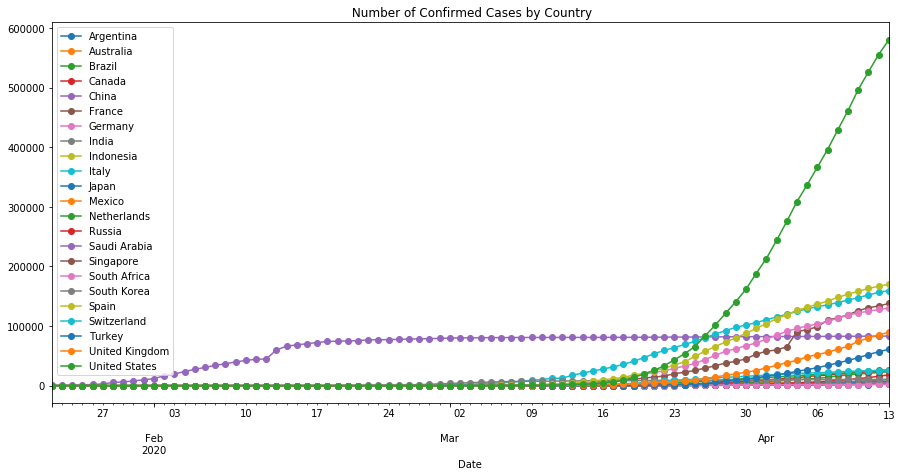

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
output.groupby(['Date','Country_Region']).sum()['Cases_Confirmed'].unstack().plot(ax=ax,style='o-')
leg = plt.legend( loc = 'bottom right')
plt.title(" Number of Confirmed Cases by Country")

Text(0.5,1,u' Number of Confirmed Death by Country')

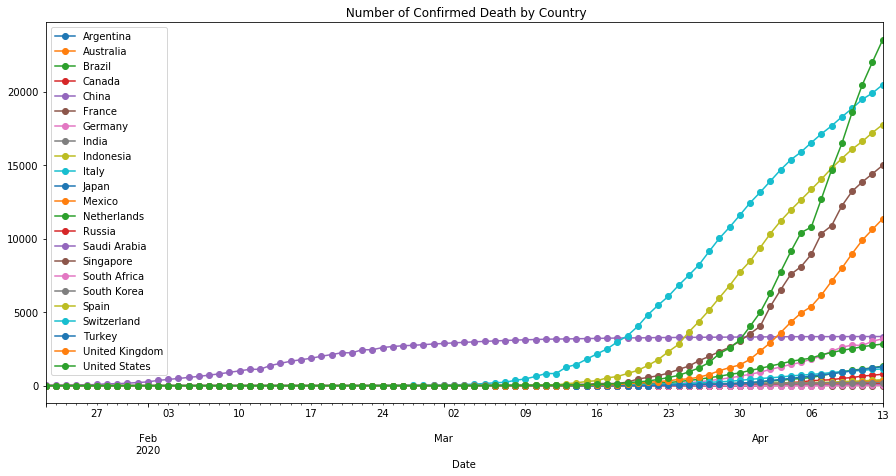

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
output.groupby(['Date','Country_Region']).sum()['Cases_Death'].unstack().plot(ax=ax,style='o-')
leg = plt.legend( loc = 'bottom right')
plt.title(" Number of Confirmed Death by Country")

Based on the charts above, we could see how different the situation is in each country. Cases trended upward in most countries and the increasing rate varied across. 
- China is a unique case since the number rise earlier and got controlled very well.
- US is an opposite case which was hit by pandemic pretty late and the confrimed cases / death cases are still rising up.
- The death rate (death case/confirmed case) in Italy, Spain, United Kingdom, France is extremely high which outspeed all countries.

Also, if we looked at the confirmed case and death case for each individual country below, the pattern also varies.
- The spread of covid is slowed down in China, Australia and Korean;
- The death cases increased obviously (compared their confirmed case) in couple countries in Europe, Brazil, Indonesia, mexico.


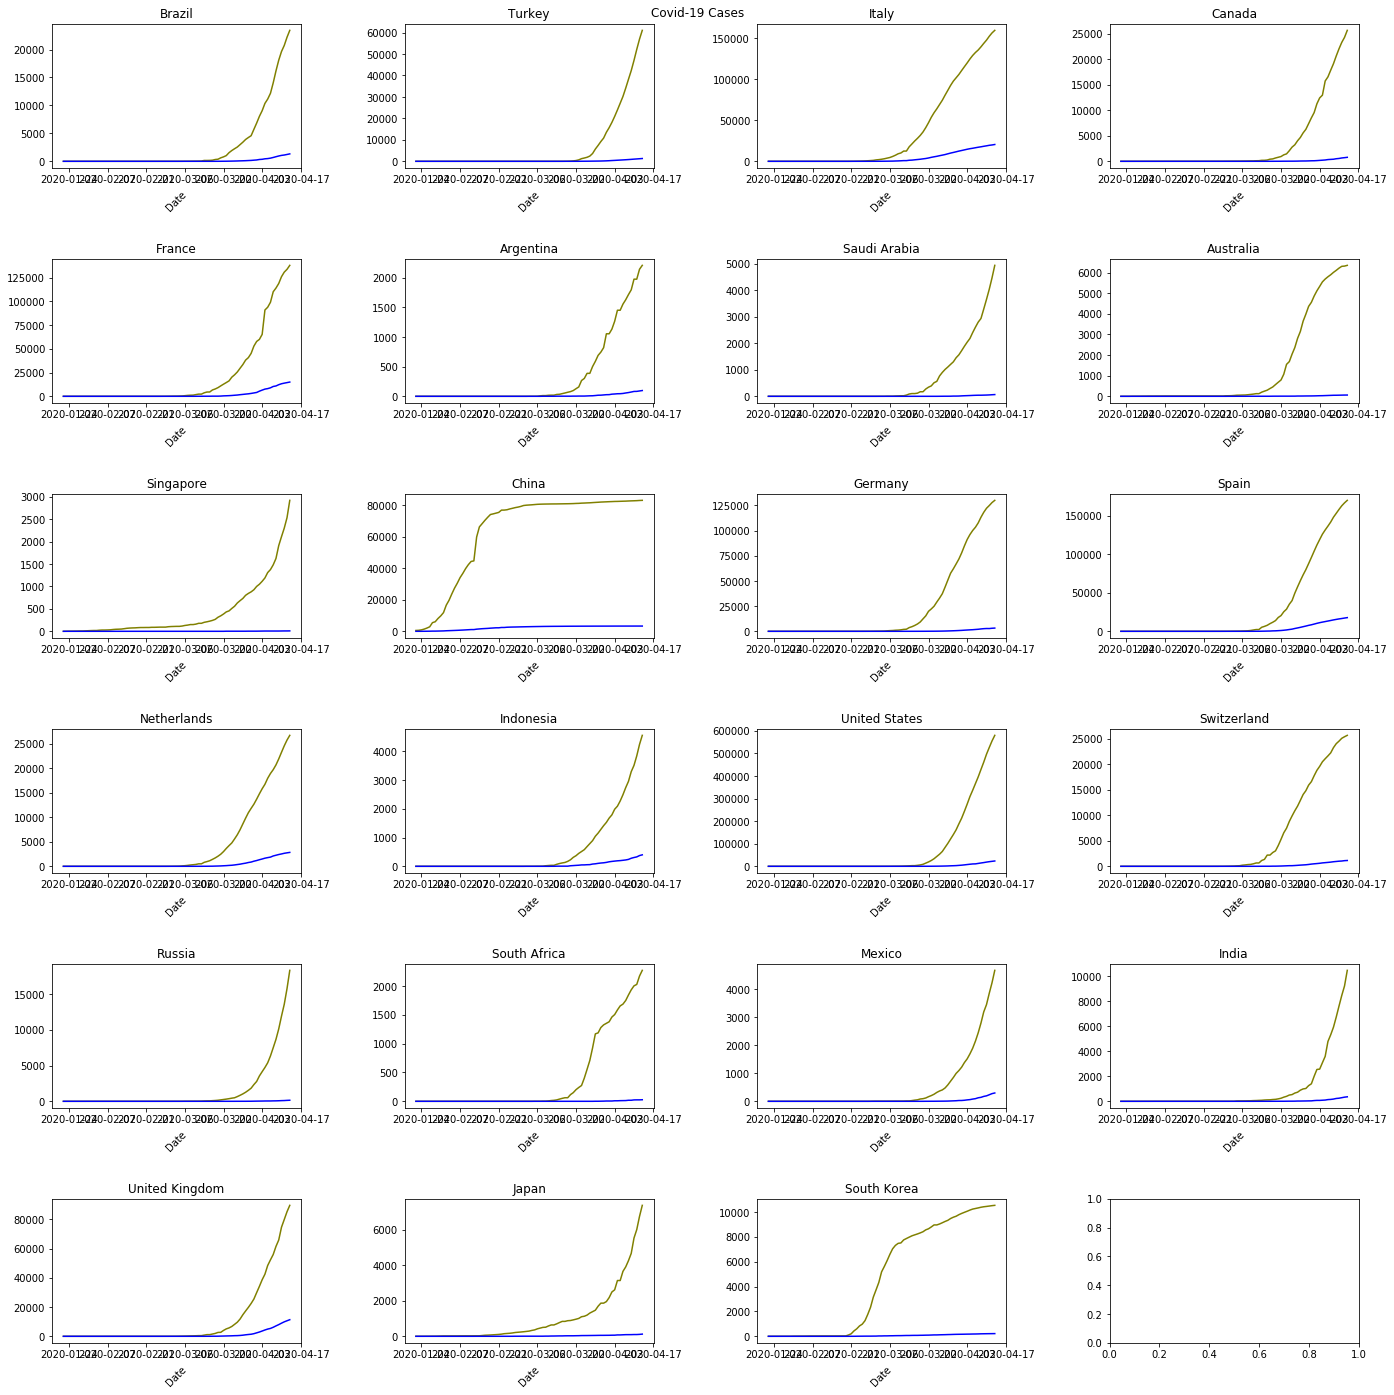

In [24]:
# 23 Countries Situation
list_country=list(set(output['Country_Region']))

fig, ax = plt.subplots(nrows=6, ncols=4,figsize=(20,20))
i=0
for row in ax:
    for col in row:
        #print (row)
        country_name=list_country[i]
        plot_data=output[output['Country_Region']==country_name]
        col.plot(plot_data['Date'],plot_data['Cases_Confirmed'],color='olive')
        col.plot(plot_data['Date'],plot_data['Cases_Death'],color='blue')
        col.set_title(country_name)
        col.set_xlabel(xlabel='Date',rotation=45)

        i=i+1
        if i>=23:
            break

fig.suptitle('Covid-19 Cases')
fig.tight_layout(pad=3.0)
plt.show()


One question left above is that the total population might heavily impact the number of cases. So below we leverage the total population to understand the percentage of confirmed cases (out of population) to understand the trend.

Based on the percentage of cases out of the population, the situation in Spain,Italy, France and Switzerland are much worse.

In [25]:
# Add population for each country
result=output.merge(population,left_on=['Country_Region'],right_on=['Country'],how='left')
result['Cases_Confirmed_Population']=result['Cases_Confirmed']/result['Population (2020)']
result['Cases_Death_Population']=result['Cases_Death']/result['Population (2020)']

Text(0.5,1,u' % Confirmed Cases by Country (out of total population)')

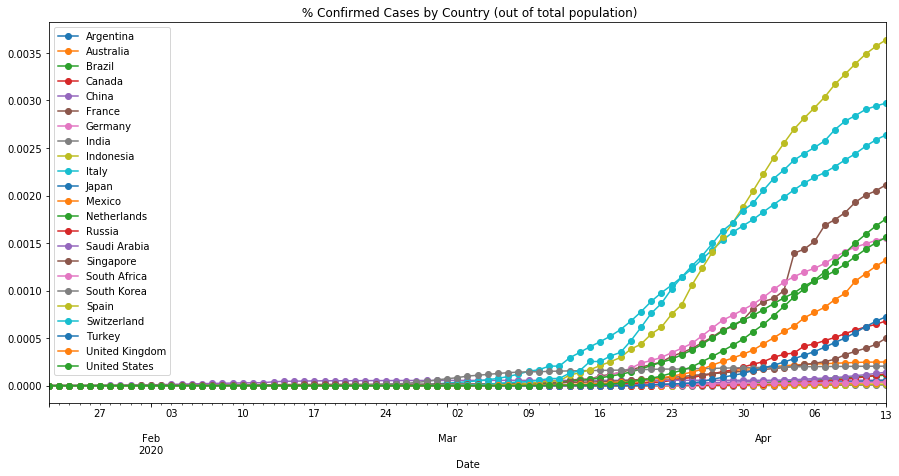

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
result.groupby(['Date','Country_Region']).sum()['Cases_Confirmed_Population'].unstack().plot(ax=ax,style='o-')
leg = plt.legend( loc = 'bottom right')
plt.title(" % Confirmed Cases by Country (out of total population)")

Text(0.5,1,u' % Confirmed Death by Country (out of total population)')

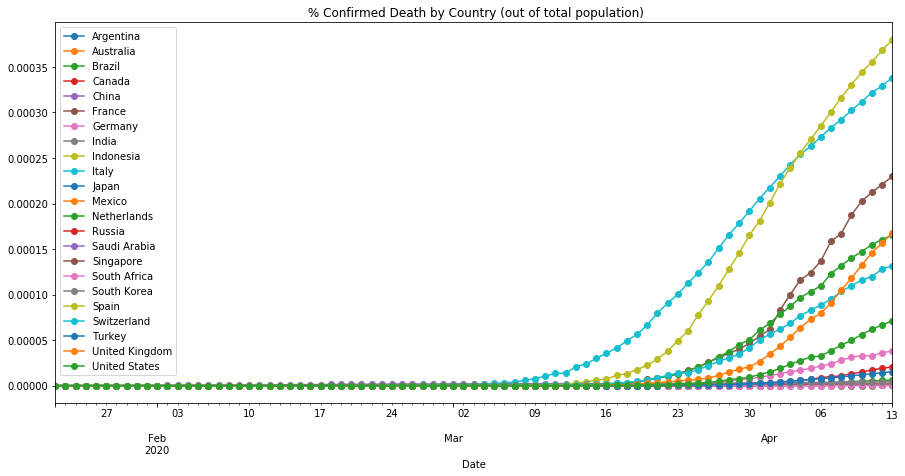

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
result.groupby(['Date','Country_Region']).sum()['Cases_Death_Population'].unstack().plot(ax=ax,style='o-')
leg = plt.legend( loc = 'bottom right')
plt.title(" % Confirmed Death by Country (out of total population)")

Based on the visuals above, here are couple metrics we'll include in the evaluation,
- Mean number of confirmed and death case 
- Current number of confirmed and death case out of the total population 
- Avg Growth rate of confirmed and death case
- Avg Death rate (death case/confirmed case)

In [28]:
# Add Growth rate (confirmed and death case)
result['growth_cases_confirmed']=result['Difference_Confirmed']/result['Cases_Confirmed']
result['growth_cases_death']=result['Difference_Death']/result['Cases_Death']

In [29]:
# Add Death rate
result['death_rate']=result['Cases_Death']/result['Cases_Confirmed']

- What's the economic status across indicators in G20 Countries?

In [30]:
# Select the economic indicators
econ_data_result=econ_data_result[['Markets', 'Time','unit','Corporate Tax Rate(%)', 'Currency',
       'Current Account to GDP(%)', 'GDP Annual Growth Rate(%)',
       'GDP Growth Rate(%)', 'Government Budget(% of GDP)',
       'Government Debt to GDP(%)', 'Inflation Rate(%)', 'Interest Rate(%)',
       'Personal Income Tax Rate(%)', 'Stock Market(points)',
       'Unemployment Rate(%)', u'Current Account']]

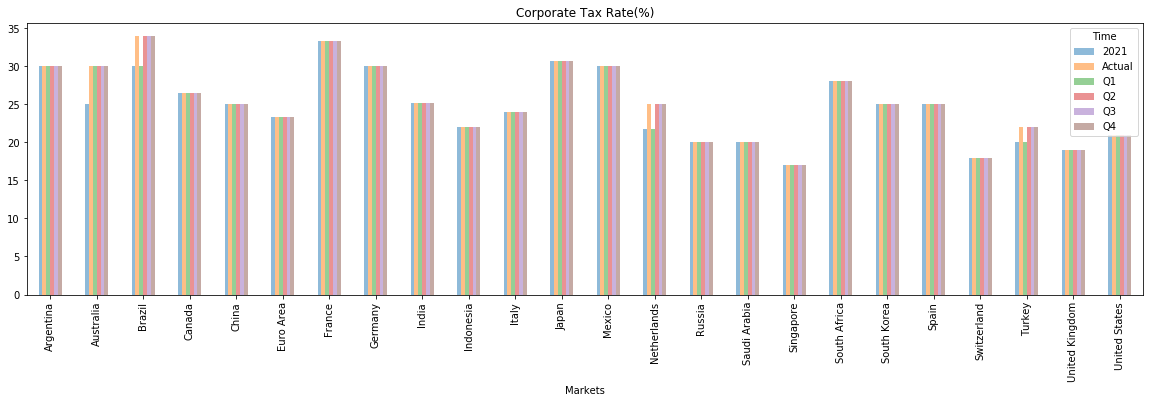

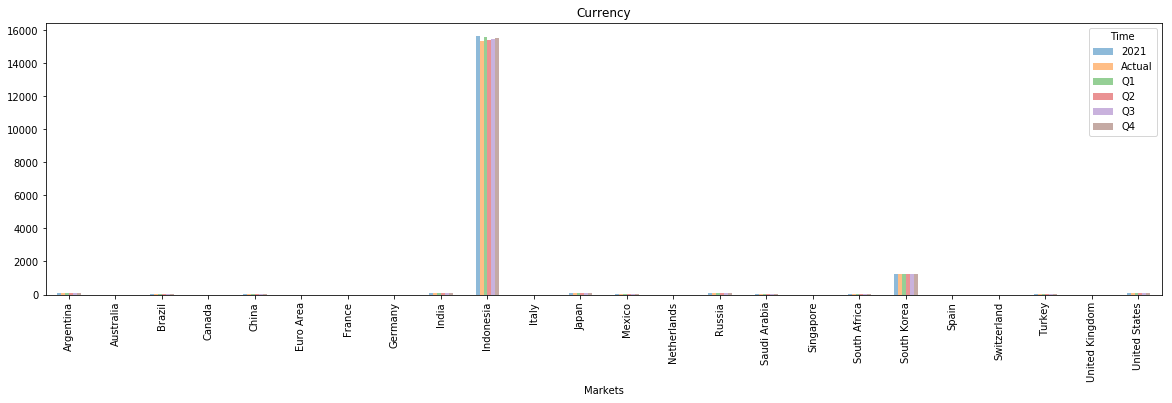

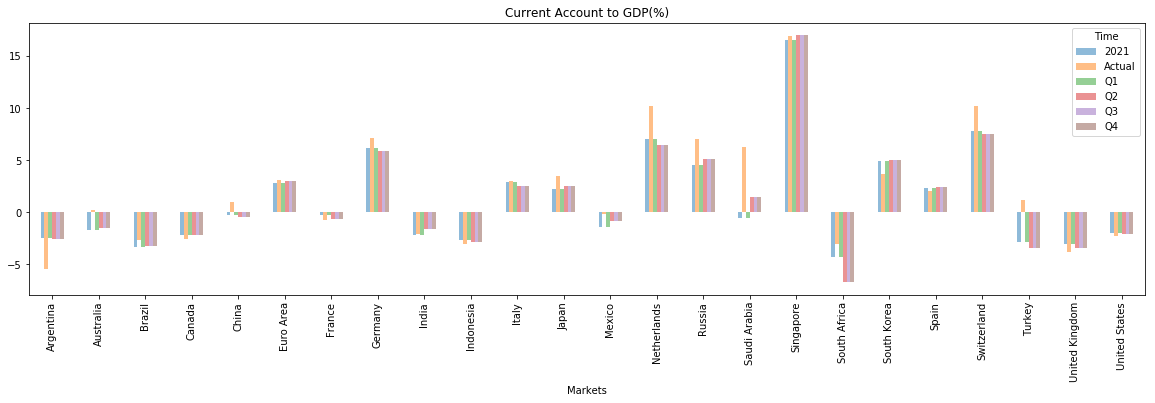

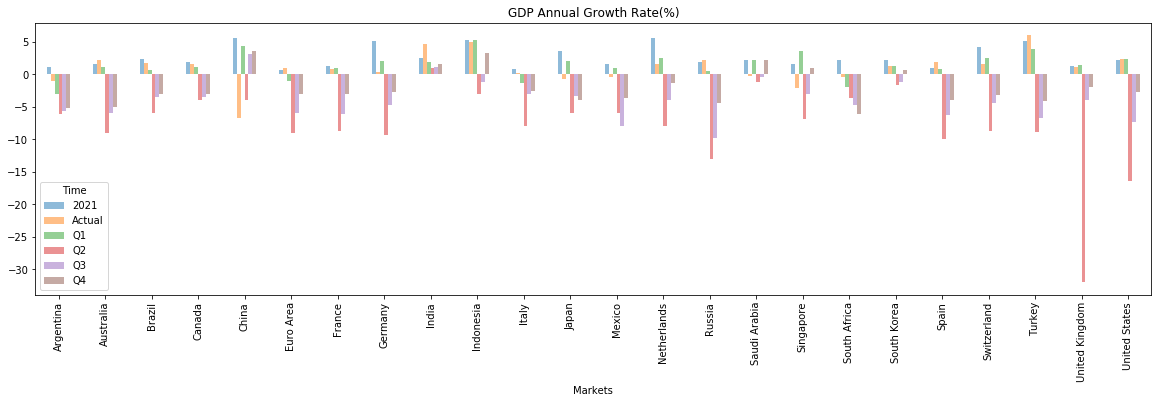

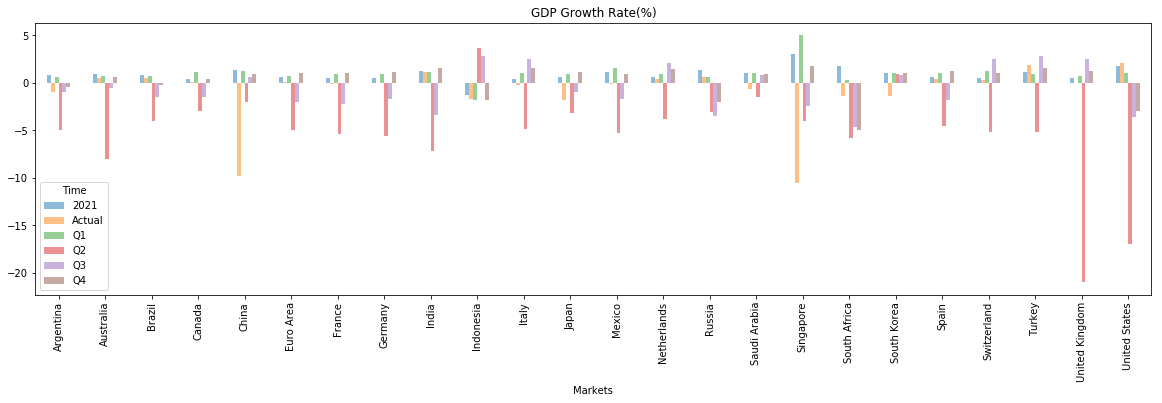

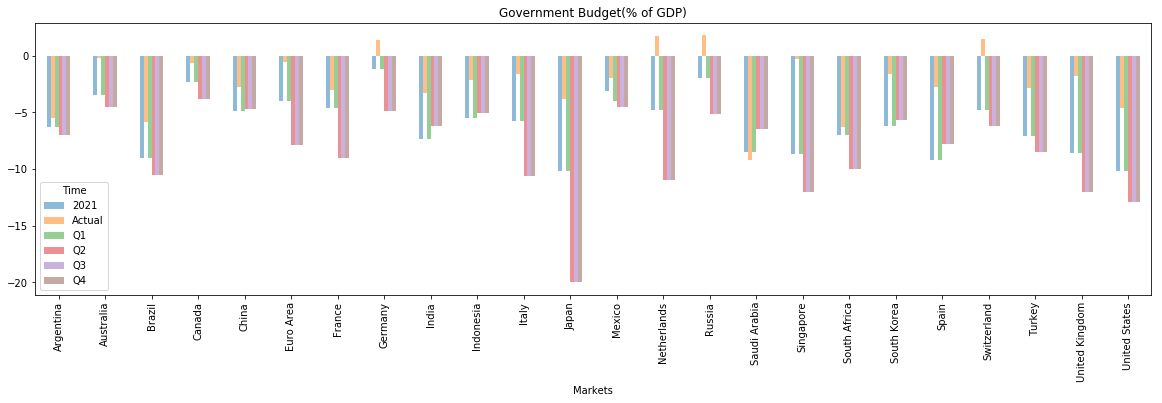

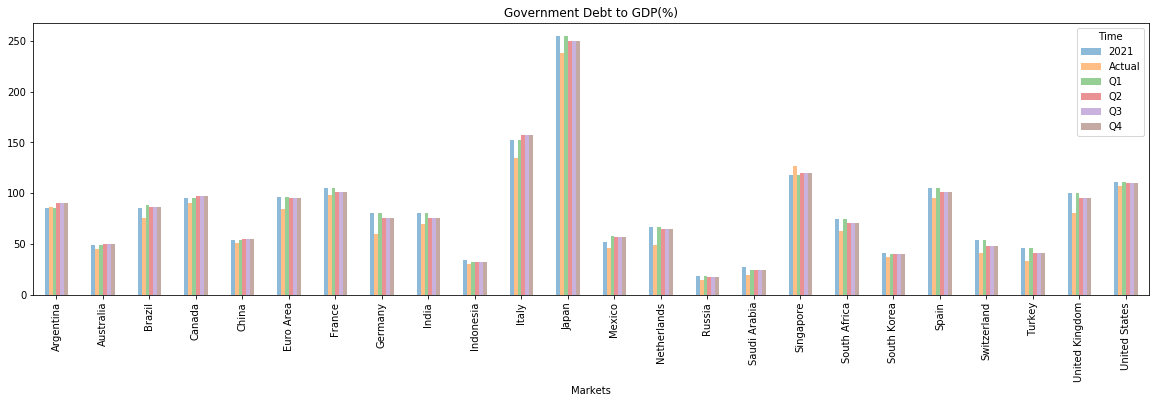

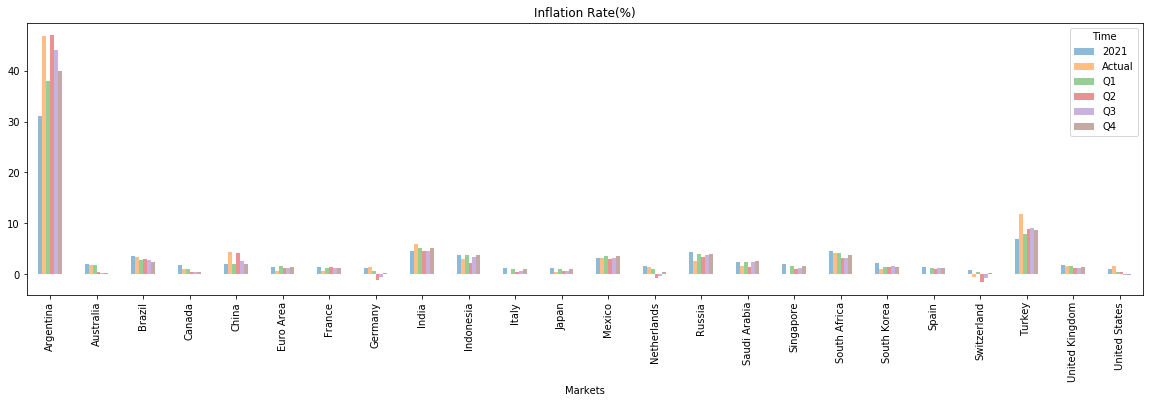

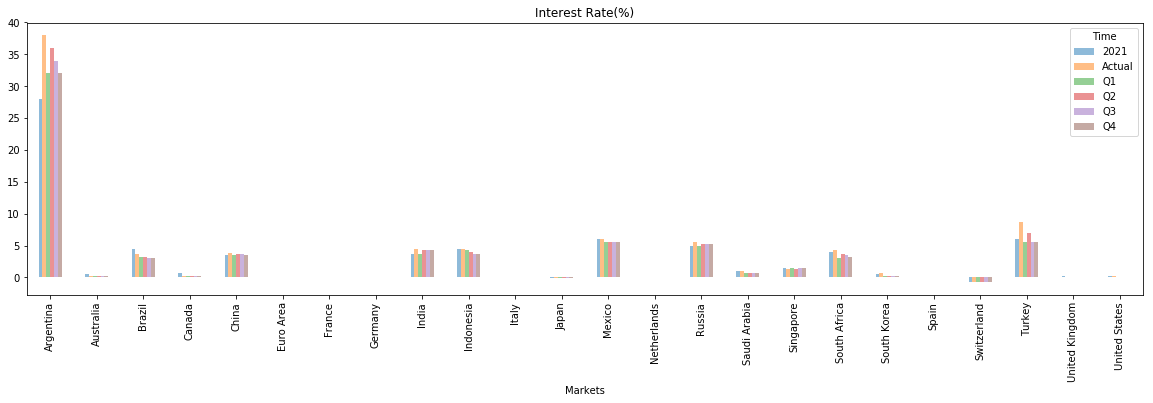

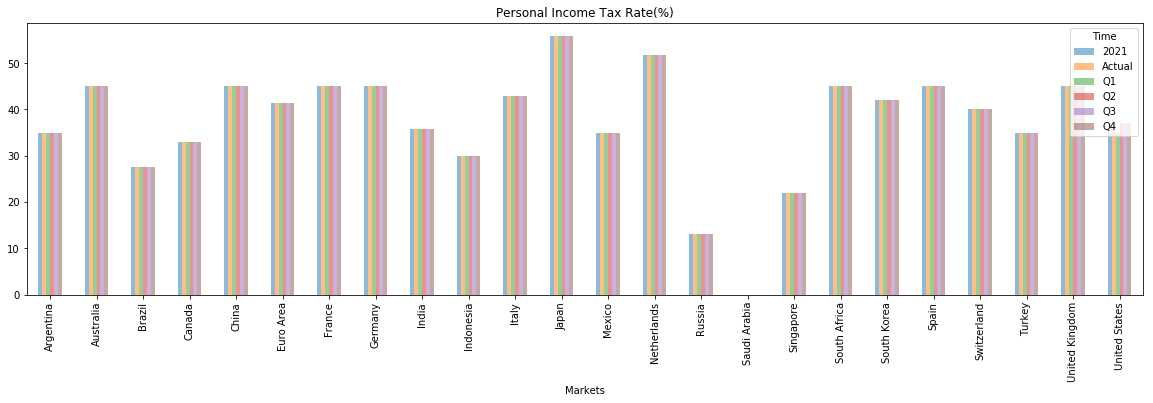

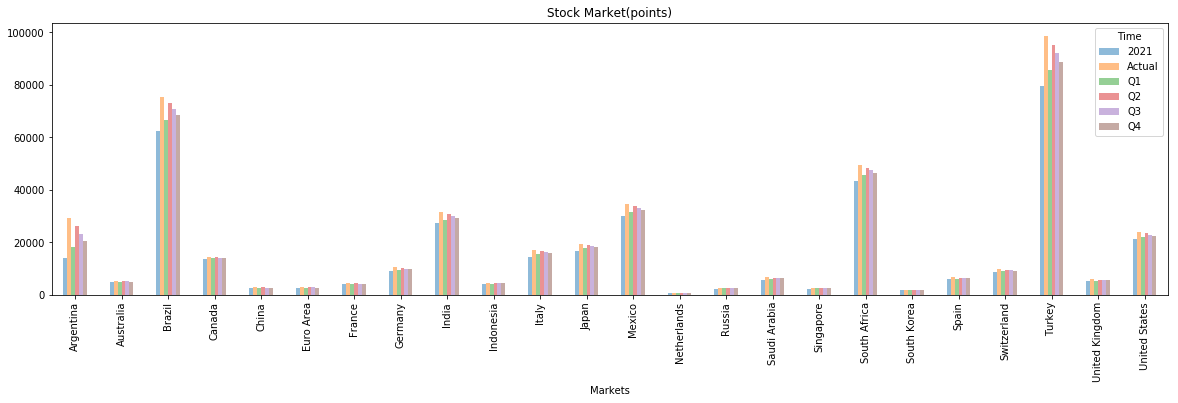

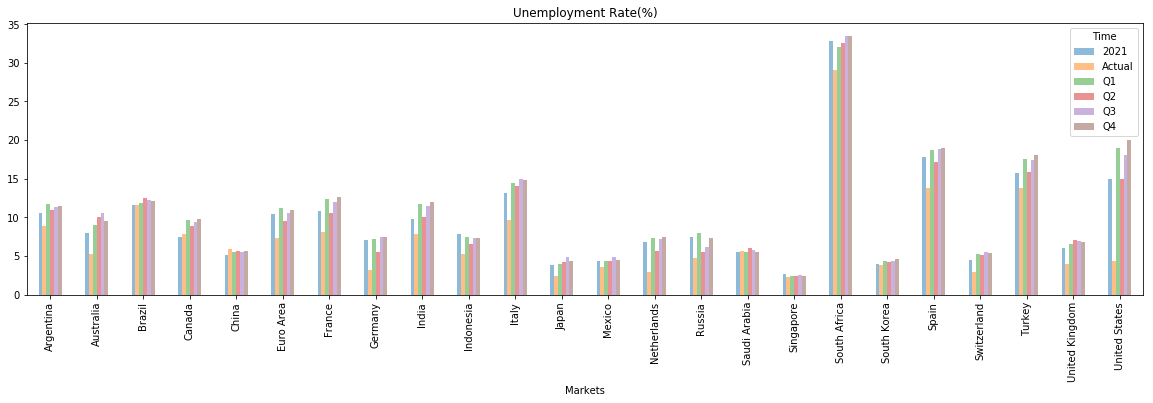

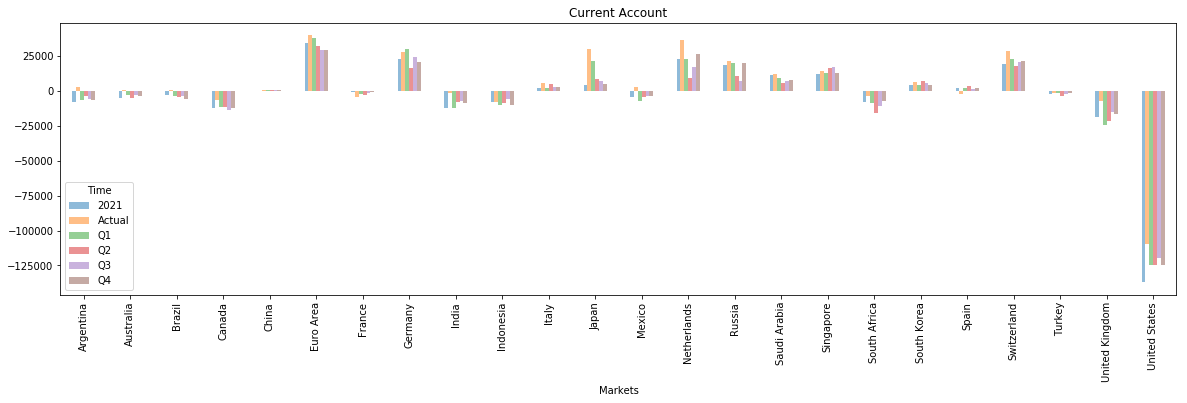

In [31]:
econ_columns=list(econ_data_result.columns[3:])
for n in econ_columns:
    #fig, ax = plt.subplots(figsize=(20, 10))
    ax = econ_data_result.groupby(['Markets','Time']).sum()[n].unstack().plot.bar(
                    #x='Markets', 
                    #  y=n, 
                      align='center', 
                      alpha=0.5,figsize=(20, 5), title=n)

What we could read from the chart above,

* GDP Growth Rate %: It in general is negative from Q2-Q4 and all of them are able to get it back to be positive in 2021.

* Government Budget (% of GDP): It is predicted as negative in 2021 across countries and only Switzerland, Netherland, Russia, Germany are the only countries with positive % in actual.

* Government Debt (% of GDP): Japan, Italy, Singapore, United states are the top countries with highest % of GDP in goverment debt.

* Inflation rate (%): Argentina, Turkey are the top two countries with highest inflation rate.

* Interest rate (%): Argentina, Turkey, Mexico, Brazil, Russia, South Africa, Indonesia,India,China still keep their interest rate at the high level. During the Pandemic situation, all countries started to lower their interest rate in order to boost the economy, so the countries above have more space to confront with the worse situation.

* Unemployement rate (%): South Africa, United States, Turkey, and Spain are the top countries with highest unemployment rate.

* Current account: United States, United Kindom, South Africa are the top countries with the highest negative current account value, which indicate all of them are big net importer; on the other hand, countries in euro area are net exporters. If we bring the GDP as denominator by looking at the current account to GDP%, United Kindom, South Africa, United States,Brazile, Canada, Argentina etc are a net importer and Singapore, Switzerland, Netherlands, Germany etc are more like a net exporter.

* Currency, stock market (points) will be excluded in the evaluation since they cannot reflect the economic conditions across countries.

Based on what we observed above, below are the indicators (Actual/2021) we will include in the evaluation,
- GDP Growth Rate(%): compared to the annual growth rate, it could reflect the economic status more directly. 
- Government Budget (% of GDP): it reflected the spending and revenues of government, which is a good incator of goverment capabilities.
- Government Debt (% of GDP):A good indicator of the government burden.
- Inflation rate (%): Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over some period of time. If it is higher, it indicates a decrease in the purchasing power of a nation's currency.
- Interest rate (%): Combined with inflation rate, it reflected the potential economy stimulus. The lower the intreset rate, the higher the chances that people will spend more.
- Unemployment rate (%): a good indicator showing economy's spare capacity, unused resources, and potential social problems.
- Current Account to GDP (%): a good indicator representing if the country is a net exporter or net importer.
- Personal Income Tax Rate / Corporate Tax Rate: both are good indicator representing the cost of making investments. The higher the income tax rate, the less the capital flowing in, with fewer jobs and wages.


In [32]:
econ_data_actual=econ_data_result[econ_data_result['Time']=='Actual']
econ_data_2021=econ_data_result[econ_data_result['Time']=='2021']
econ_data_actual_map=econ_data_actual[['Markets',
       'GDP Growth Rate(%)', 'Government Budget(% of GDP)',
       'Government Debt to GDP(%)', 'Inflation Rate(%)', 'Interest Rate(%)',
       'Unemployment Rate(%)','Current Account to GDP(%)',
        'Personal Income Tax Rate(%)', 'Corporate Tax Rate(%)']]

econ_data_2021_map=econ_data_2021[['Markets',
       'GDP Growth Rate(%)', 'Government Budget(% of GDP)',
       'Government Debt to GDP(%)', 'Inflation Rate(%)', 'Interest Rate(%)',
       'Unemployment Rate(%)','Current Account to GDP(%)',
        'Personal Income Tax Rate(%)', 'Corporate Tax Rate(%)']]

In [33]:
econ_data_actual_map.columns=econ_data_actual_map.columns+'_actual'
econ_data_2021_map.columns=econ_data_2021_map.columns+'_2021'

###### Evaluation 

A. Covid-19:

- Mean number of confirmed and death case
- Current number of confirmed and death case out of the total population
- Avg Growth rate of confirmed and death case
- Avg Death rate (death case/confirmed case)

B. Economic Indicator:

- GDP Growth Rate(%)
- Government Budget (% of GDP)
- Government Debt (% of GDP)
- Inflation rate (%)
- Interest rate (%)
- Unemployment rate (%)
- Current Account to GDP (%)
- Personal Income Tax Rate / Corporate Tax Rate

In [34]:
# Get mean value for confirmed, death case
# Get the avg growth, death rate 
covid_result=result.groupby('Country_Region').mean()[['Cases_Confirmed','Cases_Death','growth_cases_confirmed','growth_cases_death','death_rate']].reset_index()
# Current number of confirmed and death case out of the total population
covid_current=result[result['Date']=='2020-04-13']
covid_current_output=covid_current[['Country_Region','Cases_Confirmed_Population','Cases_Death_Population']]

In [35]:
covid_result=covid_result.merge(covid_current_output,on='Country_Region',how='left')
covid_result=covid_result.rename(columns={"Cases_Confirmed":"Cases_Confirmed_mean","Cases_Death":"Cases_Death_mean"})
covid_result.head()

,Country_Region,Cases_Confirmed_mean,Cases_Death_mean,growth_cases_confirmed,growth_cases_death,death_rate,Cases_Confirmed_Population,Cases_Death_Population
0,Argentina,335.843373,11.313253,0.171322,0.133373,0.031885,0.000049,0.000002
1,Australia,1345.626506,8.975904,0.095757,0.102560,0.007699,0.000250,0.000002
2,Brazil,2759.060241,127.481928,0.188193,0.245477,0.019369,0.000110,0.000006
3,Canada,3415.746988,69.578313,0.124352,0.178266,0.006426,0.000681,0.000021
4,China,63405.072289,2278.771084,0.064521,0.068590,0.033404,0.000058,0.000002


In [59]:
output_result=covid_result.merge(econ_data_actual_map,left_on='Country_Region',right_on='Markets_actual',how='left')
output_result=output_result.merge(econ_data_2021_map,left_on='Country_Region',right_on='Markets_2021',how='left')
output_result=output_result.drop(['Markets_actual','Markets_2021'],axis=1)


In [61]:
# Add the rank for each indicator
output_result_rank=pd.DataFrame()
for i in output_result.columns[1:]:
    # the higher the better
    if i=='GDP Growth Rate(%)_actual' or i== 'GDP Growth Rate(%)_2021' or i== 'Government Budget(% of GDP)_actual' or i== 'Government Budget(% of GDP)_2021' or i=='Current Account to GDP(%)_actual' or i=='Current Account to GDP(%)_2021':
        output_result_rank[i] = output_result[i].rank(ascending=False)
    else:
    # the lower the better
        output_result_rank[i] = output_result[i].rank()
        
output_result_rank['Country_Region']=output_result['Country_Region']

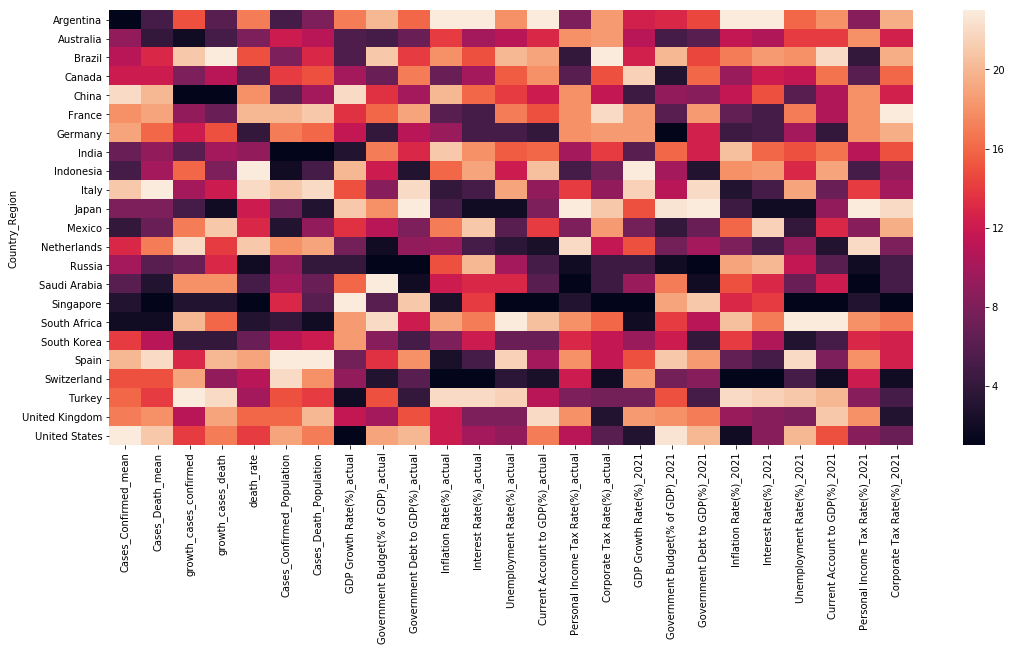

In [62]:
plt.figure(figsize=(18,8))

output_result_rank_map=output_result_rank.set_index('Country_Region')
ax = sns.heatmap(output_result_rank_map)

From what we plotted above, the rank of each measurements is dispersed across countries. If we assume that the measurement have the same % impact, we could see the result below,

In [43]:
# Covid Rank
covid_result_rank=output_result_rank[[
                                    #'Cases_Confirmed_mean','Cases_Death_mean',
                                      'growth_cases_confirmed','growth_cases_death',
                                     'death_rate','Cases_Confirmed_Population',
                                      'Cases_Death_Population','Country_Region']]
covid_result_rank['covid_rank']=covid_result_rank.iloc[:,:-1].mean(axis=1)
covid_result_rank=covid_result_rank.sort_values('covid_rank')


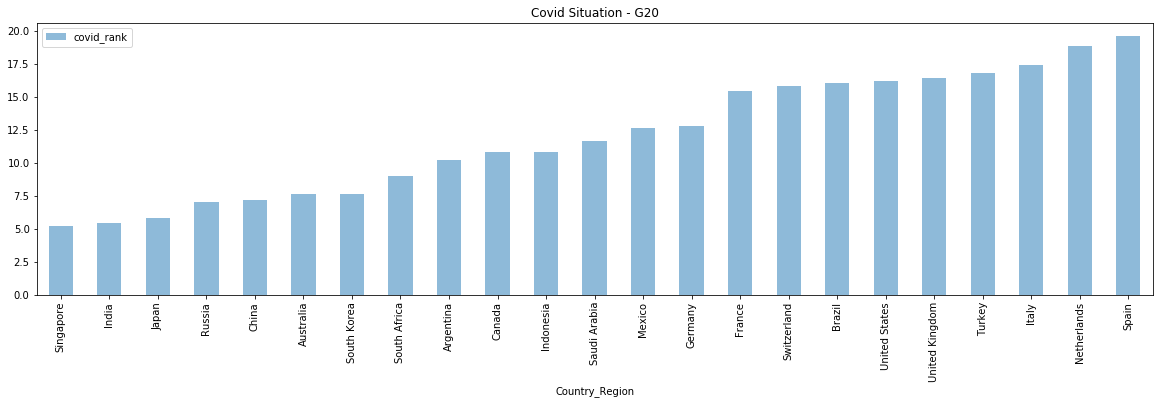

In [44]:
covid_result_rank[['Country_Region','covid_rank']].plot.bar(
                            x='Country_Region', 
                            y='covid_rank', 
                            align='center', 
                            alpha=0.5,
                            figsize=(20, 5), 
                            title='Covid Situation - G20'
)

The rank across covid-19 measurements represent the severity level of the pandemic based on mean number of cases, growth rate, death rate, and current number of cases. If the value is higher, the situation is much worse.

From the visual above, in general the pandemic situation in couple countries within Asia are in the recovery stage compared to the situation in Europe, North and South America.

In [45]:
econ_result_rank=output_result_rank.iloc[:,7:]
econ_result_rank['econ_rank']=econ_result_rank.iloc[:,:-1].mean(axis=1)
econ_result_rank=econ_result_rank.sort_values('econ_rank')

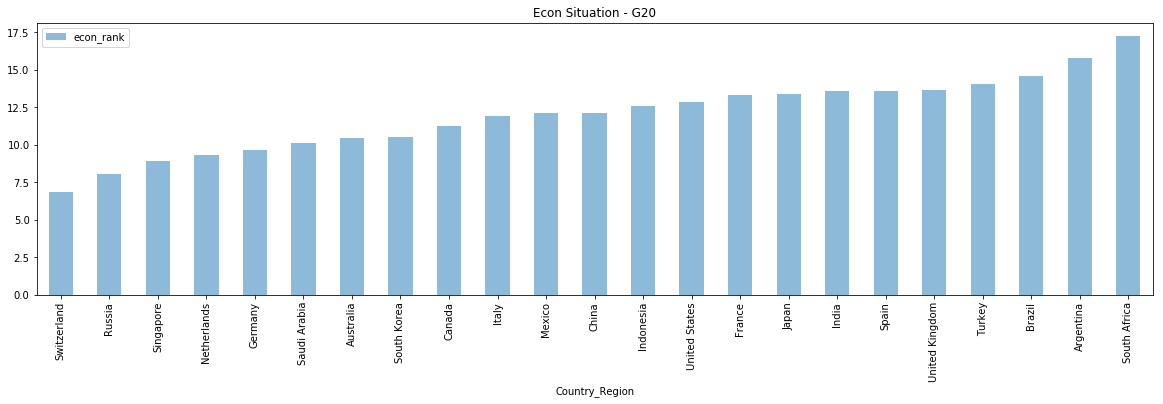

In [46]:
econ_result_rank[['Country_Region','econ_rank']].plot.bar(
                            x='Country_Region', 
                            y='econ_rank', 
                            align='center', 
                            alpha=0.5,
                            figsize=(20, 5), 
                            title='Econ Situation - G20'
)

The rank across economic measurements represents the solid foundation of each country. Except that the GDP Growth rate is higher, the economy is stronger, all the other indicators show a stronger foundation if the value is lower. In this final evaluation, if the value is higher, the situation is much worse.

From the visual above, in general Switzerland, Russia, Singapore, Netherlands, Saudi Arabia have a stronger economic foundation.

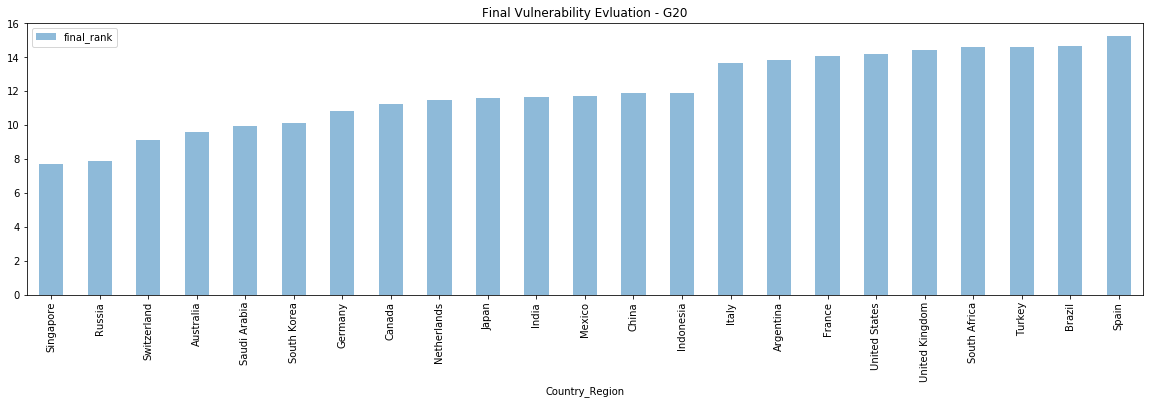

In [47]:
output_result_rank['final_rank'] = output_result_rank.iloc[:,:-1].mean(axis=1)
output_result_rank=output_result_rank.sort_values('final_rank')
output_result_rank[['Country_Region','final_rank']].plot.bar(
                            x='Country_Region', 
                            y='final_rank', 
                            align='center', 
                            alpha=0.5,
                            figsize=(20, 5), 
                            title='Final Vulnerability Evluation - G20'
)

From the final evaluation considering Covid-19 and economic foundation,

Singapore, Russia, Switzerland are the top three countries with a stronger foundation and less server pandemic situation. On the other hand, Argentina, Spain, Brazil are the countries that are more vulnerable within G20 countries.

## Clustering

In addition to the rank of vulnerability across G20, what countries are similar within the same group regarding covid-19 situation and economic foundation?

Below, I'll try couple clustering methodologies and uncover this insight.

In [63]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [64]:
dataset=output_result.set_index('Country_Region')

In [65]:
country_list=list(dataset.index)

In [68]:
X=dataset.values
# Standardize the data
scaler = StandardScaler()
scaler=scaler.fit(X)
X_input = scaler.transform(X)
#print(X_input)

In [76]:
def clustering (input_data,model):
    
    """
    The function is created to fit the input clustering model based on the input data
    input: input_data - array of standardized data you want to fit into clustering model
           model - defined clustering model 
    Output: None
    
    """
    
    # fit the model
    model.fit(input_data)
    # assign a cluster to each example
    yhat = model.predict(input_data)
    # retrieve unique clusters
    clusters=unique(yhat)
    
    # Cluster output into a dataframe
    df=pd.DataFrame()
    df['Country']=country_list
    df['Cluster']=yhat
    df=df.sort_values(['Cluster'])
    
    # Print out what are assigned in each unique clusters 
    for cluster in clusters:
        country_cluster=df[df['Cluster']==cluster]['Country'].values 
        print ('Cluster: ',cluster)
        print(country_cluster)
        
    # Print out the silhouette score which is used to evaluate the clustering result
    score_silhouette = silhouette_score(
    X_input, yhat).round(2)
    print ("Silhouette Score of model is: ",score_silhouette)

In [77]:
# define the model
model = KMeans(n_clusters=7)
# Kmeans Model
clustering (X_input,model)

('Cluster: ', 0)
['Japan']
('Cluster: ', 1)
['Mexico' 'Australia' 'Canada' 'Switzerland' 'Germany' 'India' 'Indonesia'
 'South Korea' 'Netherlands' 'Russia']
('Cluster: ', 2)
['Brazil' 'Turkey' 'Saudi Arabia' 'South Africa']
('Cluster: ', 3)
['Spain' 'United States' 'United Kingdom' 'Italy' 'France']
('Cluster: ', 4)
['Argentina']
('Cluster: ', 5)
['Singapore']
('Cluster: ', 6)
['China']
('Silhouette Score of model is: ', 0.14000000000000001)


In [78]:
# define the model
model = GaussianMixture(n_components=7)
clustering (X_input,model)

('Cluster: ', 0)
['United States' 'Spain' 'France' 'Japan' 'Italy']
('Cluster: ', 1)
['South Korea' 'Russia' 'United Kingdom' 'Mexico' 'India' 'Germany'
 'Canada' 'Australia' 'Indonesia']
('Cluster: ', 2)
['Argentina']
('Cluster: ', 3)
['Singapore']
('Cluster: ', 4)
['Netherlands' 'Switzerland']
('Cluster: ', 5)
['Saudi Arabia' 'South Africa' 'Brazil' 'Turkey']
('Cluster: ', 6)
['China']
('Silhouette Score of model is: ', 0.10000000000000001)


In [80]:
# define the model
model = AffinityPropagation()
#  AffinityPropagation Model
clustering (X_input,model)

('Cluster: ', 0)
['Argentina']
('Cluster: ', 1)
['Turkey' 'South Korea' 'South Africa' 'Saudi Arabia' 'Russia'
 'United Kingdom' 'Indonesia' 'Mexico' 'China' 'Canada' 'Brazil'
 'Australia' 'India']
('Cluster: ', 2)
['Japan']
('Cluster: ', 3)
['Germany' 'Netherlands' 'Switzerland']
('Cluster: ', 4)
['Singapore']
('Cluster: ', 5)
['Italy' 'France' 'Spain' 'United States']
('Silhouette Score of model is: ', 0.10000000000000001)


Based on clustering method (Kmeans, GaussianMixture, Affinity Propagation model), we could see KMeans model with the higher score (silhouette). 

In the result we could see,

- Argentina is independent as one cluster, and the current status is very fragile based on the econ evaluation, which we should pay attention and watch out.

- Russia, Saudi Arabia, Singapore are clustered in one group, and in general the covid-19 situation is controlled well and econ foundation is pretty strong. We could look for potential opportunities within.

- Australia, South Korea, China, Germany are clustered in another group, and in general the spread of covid-19 is controlled and econ foundation is comparatively strong. We could look for potential opportunities within.

- United States, Switzerland, Netherlands, United Kingdom, Indonesia have a strong econ foundation but the covid-19 situation is not controlled well.

- India, South Africa, Canada, Brazil, Turkey, Mexico have some uncertainty based on covid-19 and economic situation. France, Spain, Italy have relatively worse pandemic situation.
